   ## Housing prices, data analysis and predictions
___

    1 Determining what is the price changes per county from 2010 to 2016


## Census API


#### Code and Description
____


* B01003_001E = Population 
* B01002_001E = Median Age 
* B19013_001E = Household Income
* B19301_001E = Per Capita Income
* B25077_001E = Median Value Housing Units
* B17001_002E = Poverty Count 
____


<br />
<br />

## FIPS (Federal Information Processing Standards)

#### State FIPS code
* 13 Georgia

#### County FIPS code
___

* 13121 - Fulton County
* 13135 - Gwinnett County
* 13089 - DeKalb County
* 13067 - Cobb County
* 13063 - Clayton County
* 13057 - Cherokee County
* 13151 - Henry County
* 13117 - Forsyth County
* 13097 - Douglas County
___


In [1]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import requests
from census import Census
import gmaps

# Census & gmaps API Keys
from security.census_key import (api_key, gkey)

# Internal functionality
from functions import print_message,calculate_percentage,get_column_des,get_merged_data,get_fields,get_filters,print_message,print_plot,print_bars, get_zillow_column_des

zillow_csv = './data/County_MedianListingPrice_AllHomes.csv'

# Years to be retrieved from census API
years = np.arange(2010, 2017, 1)

In [2]:
# Run Census Search to retrieve data on all Atlanta metro counties
array_census_data = []

print_message("Starting retrieving data from Census API")

for year in years:
    census_API = Census(api_key, year = year)

    array_census_data.append(pd.DataFrame(census_API.acs5.get(get_fields(), get_filters())).rename(columns = get_column_des(year)))
    
    print(f"Processing data from census on year:{year}")


print_message("Retrieving data from Census API done")


-----------------------------------------
Starting retrieving data from Census API
-----------------------------------------
Processing data from census on year:2010
Processing data from census on year:2011
Processing data from census on year:2012
Processing data from census on year:2013
Processing data from census on year:2014
Processing data from census on year:2015
Processing data from census on year:2016
-----------------------------------------
Retrieving data from Census API done
-----------------------------------------


In [3]:
census_data = get_merged_data(array_census_data, ['Name', 'State', 'MunicipalCodeFIPS'])

census_data.drop(columns="State", inplace=True)

census_data.set_index(["MunicipalCodeFIPS", "Name"], inplace=True)

census_data.head()

,,Median Age 2010,Population 2010,Poverty Count 2010,Household Income 2010,Per Capita Income 2010,Median Value Housing Units 2010,Median Age 2011,Population 2011,Poverty Count 2011,Household Income 2011,...,Poverty Count 2015,Household Income 2015,Per Capita Income 2015,Median Value Housing Units 2015,Median Age 2016,Population 2016,Poverty Count 2016,Household Income 2016,Per Capita Income 2016,Median Value Housing Units 2016
MunicipalCodeFIPS,Name,,,,,,,,,,,,,,,,,,,,,
013,"Barrow County, Georgia",32.9,66359.0,8295.0,48958.0,20882.0,138900.0,33.1,68061,8912,50604,...,10902.0,52012.0,21411.0,119700.0,35.0,73340.0,10548.0,53133.0,21978.0,123200.0
015,"Bartow County, Georgia",36.1,97423.0,13472.0,49216.0,22241.0,146800.0,36.2,98905,15076,49060,...,15819.0,48893.0,22592.0,123800.0,37.4,101942.0,14899.0,50565.0,23376.0,128200.0
045,"Carroll County, Georgia",33.2,109227.0,18339.0,45559.0,20523.0,139900.0,33.5,110292,19253,45752,...,22441.0,43586.0,21320.0,112100.0,34.1,113756.0,21157.0,45486.0,22002.0,113700.0
057,"Cherokee County, Georgia",35.7,206283.0,15143.0,66320.0,30217.0,201900.0,36.1,211316,16113,66717,...,24273.0,68926.0,30595.0,190500.0,37.7,230629.0,22891.0,72586.0,32002.0,204400.0
063,"Clayton County, Georgia",31.1,260156.0,42408.0,43311.0,18958.0,127800.0,31.3,260756,46881,42936,...,65787.0,40938.0,18107.0,85200.0,32.4,270269.0,64326.0,42470.0,18728.0,86700.0


In [4]:
zillow_data = pd.read_csv(zillow_csv)

georgia_fips = 13
county_fips = ['121','135','089','067','063','057','151','117','097','077','045','113','015','297','013','227','085','199','171']

metro_atlanta_data = zillow_data[(zillow_data["StateCodeFIPS"] == georgia_fips) & (zillow_data["MunicipalCodeFIPS"].isin(county_fips))]

metro_atlanta_data = metro_atlanta_data.drop(columns=["State", "Metro", "StateCodeFIPS", "SizeRank", "RegionName"])

metro_atlanta_data.set_index(["MunicipalCodeFIPS"], inplace=True)

metro_atlanta_data = metro_atlanta_data.T

metro_atlanta_data.reset_index(inplace=True)

metro_atlanta_data["year"] = metro_atlanta_data["index"].apply(lambda x: x[:(len(x) - x.find("-")) + 1])

metro_atlanta_data = metro_atlanta_data.drop(columns=["index"])

metro_atlanta_data = metro_atlanta_data.groupby("year").mean()

metro_atlanta_data = metro_atlanta_data.T

metro_atlanta_data.rename(columns=get_zillow_column_des(), inplace=True)

metro_atlanta_data.head()


year,Zillow Median Value Housing 2010,Zillow Median Value Housing 2011,Zillow Median Value Housing 2012,Zillow Median Value Housing 2013,Zillow Median Value Housing 2014,Zillow Median Value Housing 2015,Zillow Median Value Housing 2016,Zillow Median Value Housing 2017,Zillow Median Value Housing 2018
MunicipalCodeFIPS,,,,,,,,,
121,214815.000000,184231.25,197416.666667,233341.666667,251515.500000,263650.416667,303332.500000,352743.125000,382600.0000
135,167389.041667,141300.00,141926.666667,181081.666667,200884.583333,218675.083333,237650.083333,255407.375000,279210.3125
89,160808.333333,126400.00,124391.666667,162425.000000,168195.833333,172700.000000,192253.458333,229408.500000,261293.1250
67,193800.000000,172334.50,180977.958333,216000.000000,235351.708333,250066.250000,283522.916667,299803.291667,317735.6250
63,68775.000000,52012.50,50278.041667,61483.333333,74382.541667,94483.250000,106954.625000,124261.791667,139737.4375


In [5]:
census_data_reset = census_data.reset_index()
census_data_reset["MunicipalCodeFIPS"] = census_data_reset["MunicipalCodeFIPS"].astype("l")

metro_atlanta_data_reset = metro_atlanta_data.reset_index()

zillow_census_data = pd.merge(census_data_reset, metro_atlanta_data_reset, how="outer", left_on="MunicipalCodeFIPS", right_on="MunicipalCodeFIPS")

zillow_census_data.set_index(["MunicipalCodeFIPS", "Name"], inplace=True)

zillow_census_data.head()


,,Median Age 2010,Population 2010,Poverty Count 2010,Household Income 2010,Per Capita Income 2010,Median Value Housing Units 2010,Median Age 2011,Population 2011,Poverty Count 2011,Household Income 2011,...,Median Value Housing Units 2016,Zillow Median Value Housing 2010,Zillow Median Value Housing 2011,Zillow Median Value Housing 2012,Zillow Median Value Housing 2013,Zillow Median Value Housing 2014,Zillow Median Value Housing 2015,Zillow Median Value Housing 2016,Zillow Median Value Housing 2017,Zillow Median Value Housing 2018
MunicipalCodeFIPS,Name,,,,,,,,,,,,,,,,,,,,,
13,"Barrow County, Georgia",32.9,66359.0,8295.0,48958.0,20882.0,138900.0,33.1,68061,8912,50604,...,123200.0,130150.000000,101891.666667,96191.666667,121120.833333,143908.875000,156055.250000,169008.333333,184349.583333,201605.6250
15,"Bartow County, Georgia",36.1,97423.0,13472.0,49216.0,22241.0,146800.0,36.2,98905,15076,49060,...,128200.0,135982.375000,121733.958333,111964.583333,127450.000000,144440.000000,158712.500000,180064.666667,196071.875000,205881.2500
45,"Carroll County, Georgia",33.2,109227.0,18339.0,45559.0,20523.0,139900.0,33.5,110292,19253,45752,...,113700.0,116294.583333,92822.916667,90464.333333,113433.333333,128007.833333,132591.666667,144666.625000,156516.666667,173343.3750
57,"Cherokee County, Georgia",35.7,206283.0,15143.0,66320.0,30217.0,201900.0,36.1,211316,16113,66717,...,204400.0,206352.166667,181889.166667,181713.125000,213870.208333,236366.666667,257103.416667,283355.041667,302666.958333,324638.3125
63,"Clayton County, Georgia",31.1,260156.0,42408.0,43311.0,18958.0,127800.0,31.3,260756,46881,42936,...,86700.0,68775.000000,52012.500000,50278.041667,61483.333333,74382.541667,94483.250000,106954.625000,124261.791667,139737.4375


In [6]:
zillow_census_data


,,Median Age 2010,Population 2010,Poverty Count 2010,Household Income 2010,Per Capita Income 2010,Median Value Housing Units 2010,Median Age 2011,Population 2011,Poverty Count 2011,Household Income 2011,...,Median Value Housing Units 2016,Zillow Median Value Housing 2010,Zillow Median Value Housing 2011,Zillow Median Value Housing 2012,Zillow Median Value Housing 2013,Zillow Median Value Housing 2014,Zillow Median Value Housing 2015,Zillow Median Value Housing 2016,Zillow Median Value Housing 2017,Zillow Median Value Housing 2018
MunicipalCodeFIPS,Name,,,,,,,,,,,,,,,,,,,,,
13,"Barrow County, Georgia",32.9,66359.0,8295.0,48958.0,20882.0,138900.0,33.1,68061,8912,50604,...,123200.0,130150.000000,101891.666667,96191.666667,121120.833333,143908.875000,156055.250000,169008.333333,184349.583333,201605.6250
15,"Bartow County, Georgia",36.1,97423.0,13472.0,49216.0,22241.0,146800.0,36.2,98905,15076,49060,...,128200.0,135982.375000,121733.958333,111964.583333,127450.000000,144440.000000,158712.500000,180064.666667,196071.875000,205881.2500
45,"Carroll County, Georgia",33.2,109227.0,18339.0,45559.0,20523.0,139900.0,33.5,110292,19253,45752,...,113700.0,116294.583333,92822.916667,90464.333333,113433.333333,128007.833333,132591.666667,144666.625000,156516.666667,173343.3750
57,"Cherokee County, Georgia",35.7,206283.0,15143.0,66320.0,30217.0,201900.0,36.1,211316,16113,66717,...,204400.0,206352.166667,181889.166667,181713.125000,213870.208333,236366.666667,257103.416667,283355.041667,302666.958333,324638.3125
63,"Clayton County, Georgia",31.1,260156.0,42408.0,43311.0,18958.0,127800.0,31.3,260756,46881,42936,...,86700.0,68775.000000,52012.500000,50278.041667,61483.333333,74382.541667,94483.250000,106954.625000,124261.791667,139737.4375
67,"Cobb County, Georgia",34.9,677402.0,71201.0,65522.0,33110.0,211000.0,35.2,684468,76183,65423,...,205600.0,193800.000000,172334.500000,180977.958333,216000.000000,235351.708333,250066.250000,283522.916667,299803.291667,317735.6250
77,"Coweta County, Georgia",36.1,121528.0,12317.0,61550.0,26161.0,177900.0,36.4,124695,13724,61015,...,182300.0,182328.708333,172737.375000,181190.833333,190146.750000,209798.750000,223904.666667,241939.791667,266535.375000,283189.9375
85,"Dawson County, Georgia",40.7,21758.0,2584.0,51128.0,25557.0,201400.0,40.3,22121,2949,51989,...,196400.0,284610.625000,245852.250000,223870.833333,228330.875000,251762.500000,286954.166667,298319.166667,300834.583333,314616.8125
89,"DeKalb County, Georgia",33.9,685371.0,107715.0,51349.0,28412.0,190000.0,34.1,690003,115584,51712,...,168100.0,160808.333333,126400.000000,124391.666667,162425.000000,168195.833333,172700.000000,192253.458333,229408.500000,261293.1250


## Histogram from 2010 dataset
___

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E96645B00>,
      dtype=object)

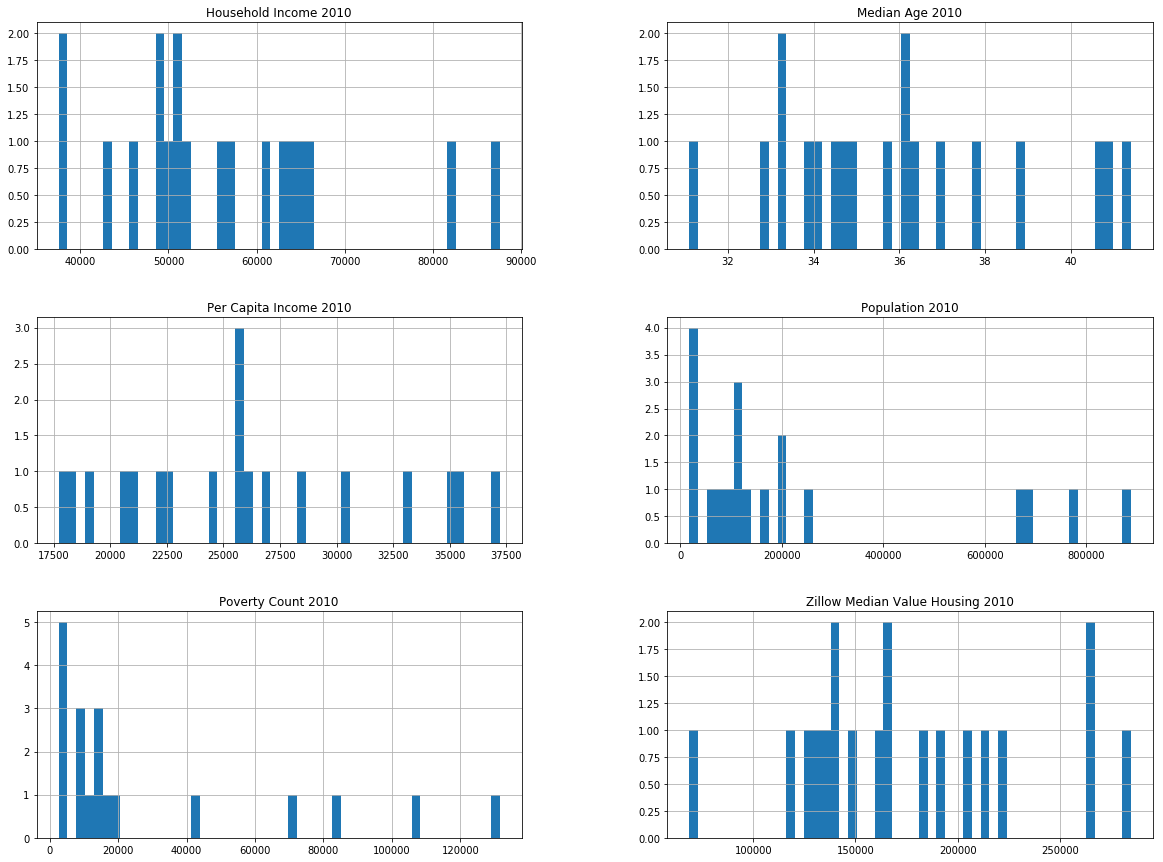

In [7]:
# Histogram on 2010
zillow_census_data[[
"Median Age 2010",
"Population 2010",
"Poverty Count 2010",
"Household Income 2010",
"Per Capita Income 2010",
"Zillow Median Value Housing 2010"]].hist(bins=50, figsize=(20, 15))

## Median value housing Plot
___

C:\Users\jense\Desktop\Project1KJCJ\functions.py:73: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])


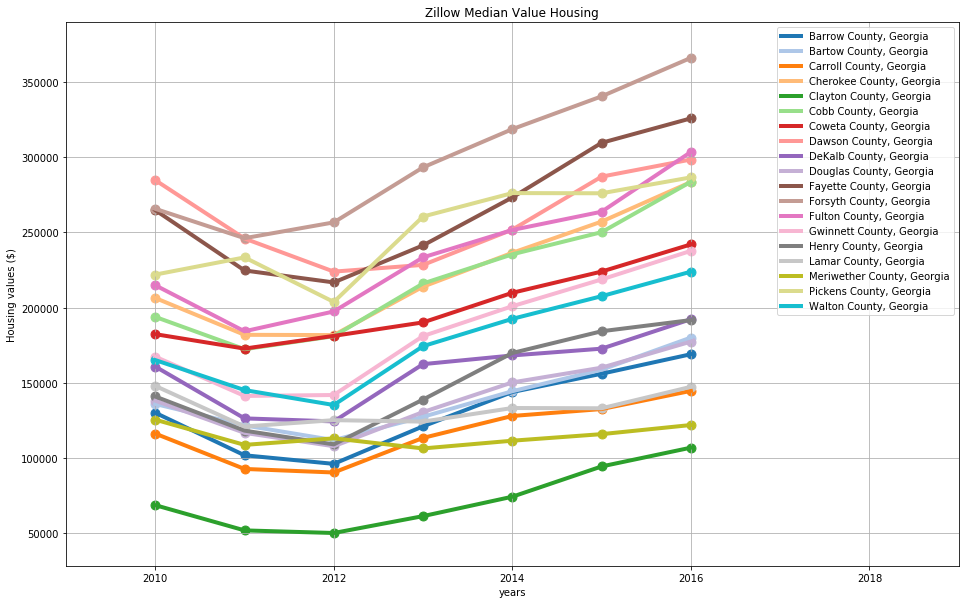

In [8]:
value_housing = zillow_census_data[['Zillow Median Value Housing 2010',
             'Zillow Median Value Housing 2011',
             'Zillow Median Value Housing 2012',
             'Zillow Median Value Housing 2013',
             'Zillow Median Value Housing 2014',
             'Zillow Median Value Housing 2015',
             'Zillow Median Value Housing 2016'
            ]].astype('float')

print_plot(value_housing, years, "Zillow Median Value Housing", "years", "Housing values ($)", (2009, 2019))

C:\Users\jense\Desktop\Project1KJCJ\functions.py:73: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])


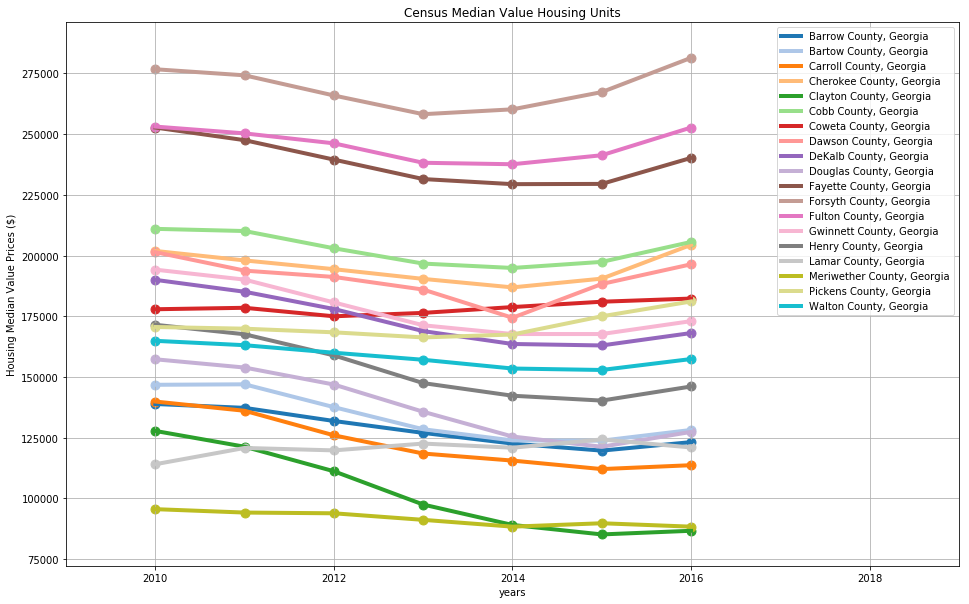

In [9]:
value_housing = zillow_census_data[['Median Value Housing Units 2010',
             'Median Value Housing Units 2011',
             'Median Value Housing Units 2012',
             'Median Value Housing Units 2013',
             'Median Value Housing Units 2014',
             'Median Value Housing Units 2015',
             'Median Value Housing Units 2016'
            ]].astype('float')

print_plot(value_housing, years, "Census Median Value Housing Units", "years", "Housing Median Value Prices ($)", (2009, 2019))

C:\Users\jense\Desktop\Project1KJCJ\functions.py:95: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])


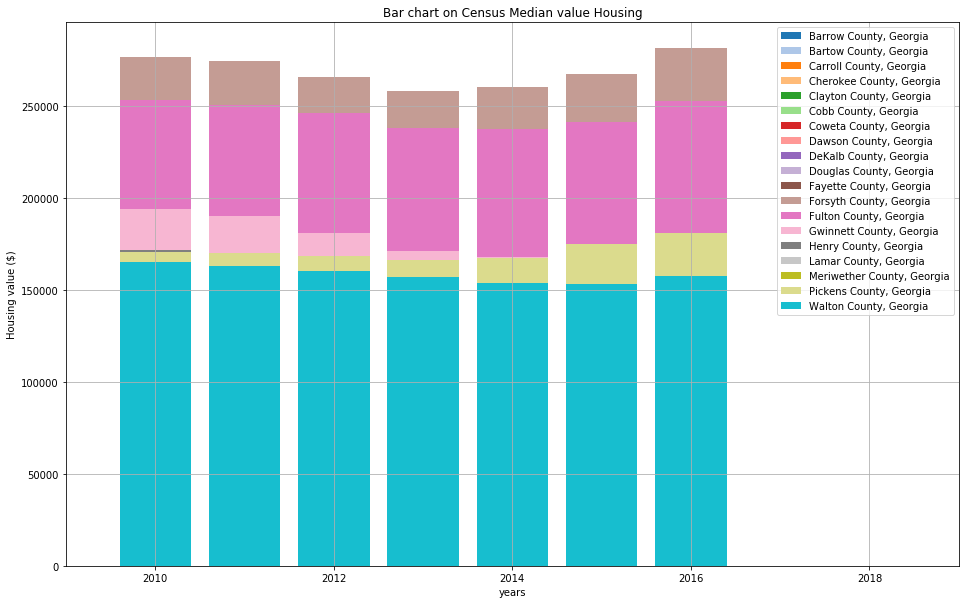

In [10]:
print_bars(value_housing, years,"Bar chart on Census Median value Housing", "years", "Housing value ($)", (2009, 2019))

## Income Per-Capita Plot
___

C:\Users\jense\Desktop\Project1KJCJ\functions.py:73: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])


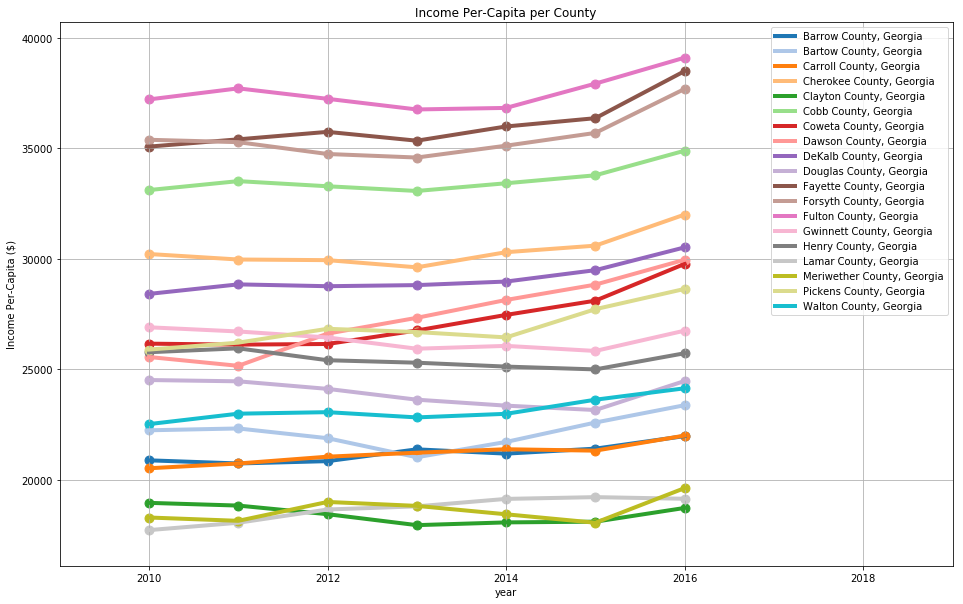

In [11]:
income_capita = census_data[['Per Capita Income 2010',
             'Per Capita Income 2011',
             'Per Capita Income 2012',
             'Per Capita Income 2013',
             'Per Capita Income 2014',
             'Per Capita Income 2015',
             'Per Capita Income 2016'
            ]].astype('float')

print_plot(income_capita, years, "Income Per-Capita per County", "year", "Income Per-Capita ($)", (2009, 2019))

C:\Users\jense\Desktop\Project1KJCJ\functions.py:73: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])


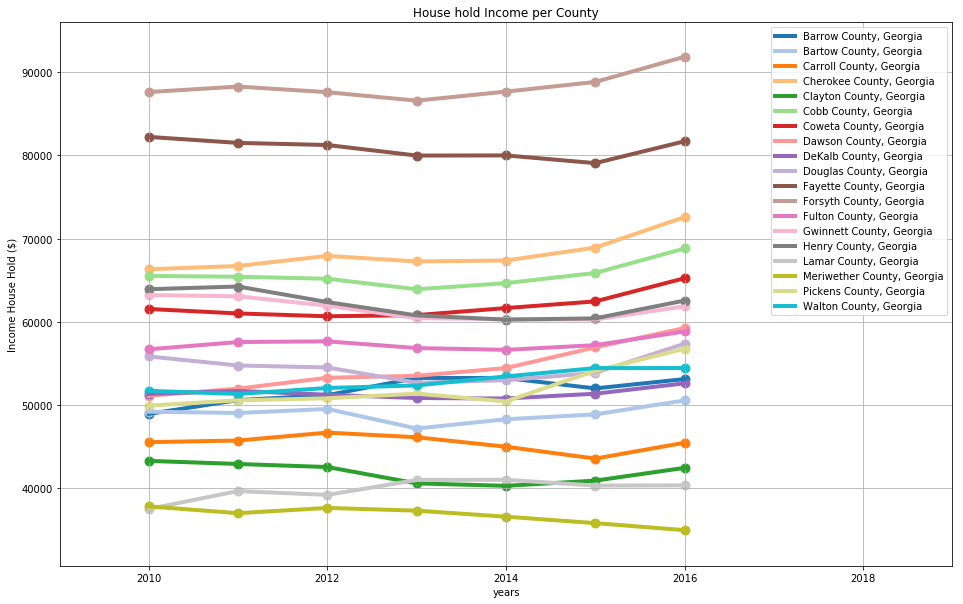

In [12]:
income_house_hold = census_data[['Household Income 2010',
             'Household Income 2011',
             'Household Income 2012',
             'Household Income 2013',
             'Household Income 2014',
             'Household Income 2015',
             'Household Income 2016'
            ]].astype('float')

print_plot(income_house_hold, years, "House hold Income per County", "years", "Income House Hold ($)", (2009, 2019))

# Scatter Plots and slopes

0.7218030659821627


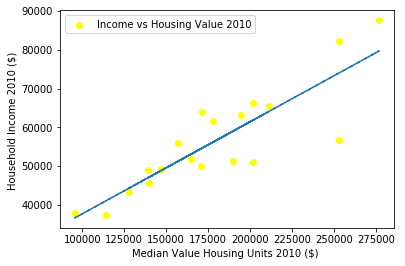

In [13]:
x_data = zillow_census_data["Median Value Housing Units 2010"]
y_data = zillow_census_data["Household Income 2010"]


plt.scatter(x_data, y_data, marker="o",color="yellow", linewidth=1, label="Income vs Housing Value 2010")
plt.legend()
plt.xlabel("Median Value Housing Units 2010 ($) ")
plt.ylabel("Household Income 2010 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)


0.7277463178035055


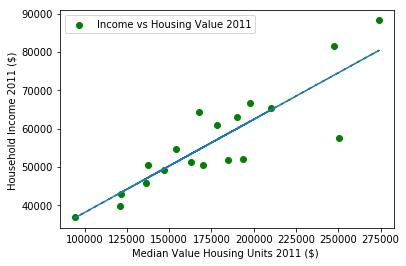

In [14]:
x_data = zillow_census_data["Median Value Housing Units 2011"].astype("l") 
y_data = zillow_census_data["Household Income 2011"].astype("l") 


plt.scatter(x_data, y_data, marker="o",color="green", linewidth=1, label="Income vs Housing Value 2011")
plt.legend()
plt.xlabel("Median Value Housing Units 2011 ($) ")
plt.ylabel("Household Income 2011 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.6951455231458809


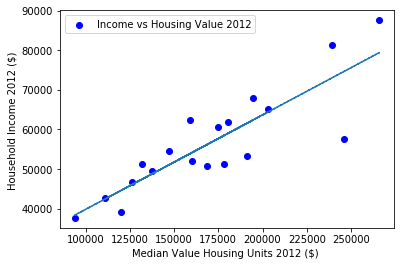

In [15]:
x_data = zillow_census_data["Median Value Housing Units 2012"]
y_data = zillow_census_data["Household Income 2012"]


plt.scatter(x_data, y_data, marker="o",color="blue", linewidth=1, label="Income vs Housing Value 2012")
plt.legend()
plt.xlabel("Median Value Housing Units 2012 ($) ")
plt.ylabel("Household Income 2012 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.6558639714241561


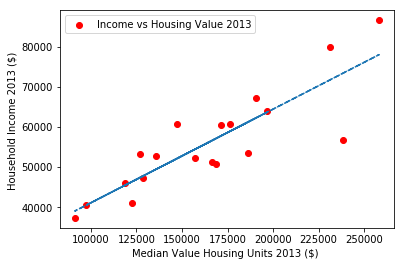

In [16]:
x_data = zillow_census_data["Median Value Housing Units 2013"]
y_data = zillow_census_data["Household Income 2013"]


plt.scatter(x_data, y_data, marker="o",color="red", linewidth=1, label="Income vs Housing Value 2013")
plt.legend()
plt.xlabel("Median Value Housing Units 2013 ($) ")
plt.ylabel("Household Income 2013 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.6335439113125721


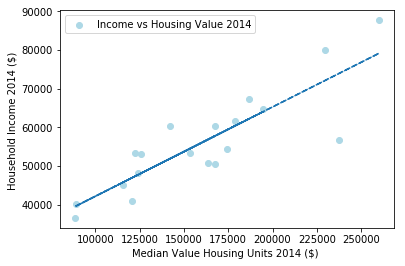

In [17]:
x_data = zillow_census_data["Median Value Housing Units 2014"]
y_data = zillow_census_data["Household Income 2014"]


plt.scatter(x_data, y_data, marker="o",color="lightblue", linewidth=1, label="Income vs Housing Value 2014")
plt.legend()
plt.xlabel("Median Value Housing Units 2014 ($) ")
plt.ylabel("Household Income 2014 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.6180232548429545


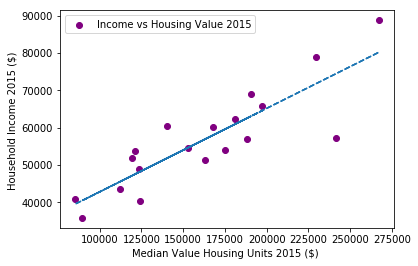

In [18]:
x_data = zillow_census_data["Median Value Housing Units 2015"]
y_data = zillow_census_data["Household Income 2015"]


plt.scatter(x_data, y_data, marker="o",color="purple", linewidth=1, label="Income vs Housing Value 2015")
plt.legend()
plt.xlabel("Median Value Housing Units 2015 ($) ")
plt.ylabel("Household Income 2015 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.6222606468003086


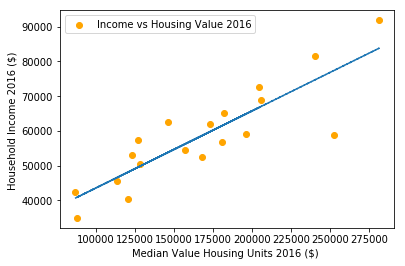

In [19]:
x_data = zillow_census_data["Median Value Housing Units 2016"]
y_data = zillow_census_data["Household Income 2016"]


plt.scatter(x_data, y_data, marker="o",color="orange", linewidth=1, label="Income vs Housing Value 2016")
plt.legend()
plt.xlabel("Median Value Housing Units 2016 ($) ")
plt.ylabel("Household Income 2016 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.03532521357107234


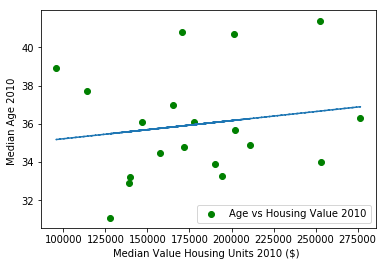

In [26]:
x_data = zillow_census_data["Median Value Housing Units 2010"]
y_data = zillow_census_data["Median Age 2010"]


plt.scatter(x_data, y_data, marker="o",color="green", linewidth=1, label="Age vs Housing Value 2010")
plt.legend()
plt.xlabel("Median Value Housing Units 2010 ($) ")
plt.ylabel("Median Age 2010 ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

TypeError: must be str, not float

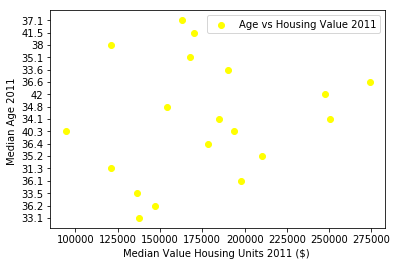

In [45]:
x_data = zillow_census_data["Median Value Housing Units 2011"].astype("l")
y_data = zillow_census_data["Median Age 2011"]


plt.scatter(x_data, y_data, marker="o",color="yellow", linewidth=1, label="Age vs Housing Value 2011")
plt.legend()
plt.xlabel("Median Value Housing Units 2011 ($) ")
plt.ylabel("Median Age 2011 ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.03443290095177636


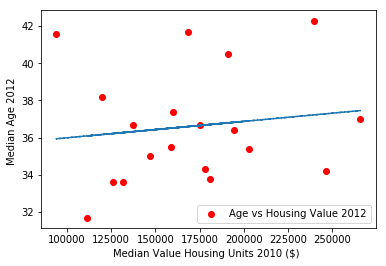

In [25]:
x_data = zillow_census_data["Median Value Housing Units 2012"]
y_data = zillow_census_data["Median Age 2012"]


plt.scatter(x_data, y_data, marker="o",color="red", linewidth=1, label="Age vs Housing Value 2012")
plt.legend()
plt.xlabel("Median Value Housing Units 2010 ($) ")
plt.ylabel("Median Age 2012 ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.05190628039868127


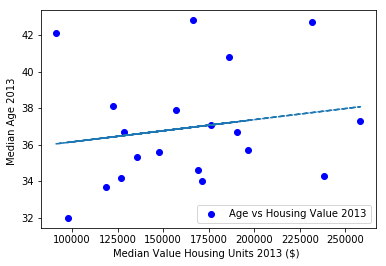

In [24]:
x_data = zillow_census_data["Median Value Housing Units 2013"]
y_data = zillow_census_data["Median Age 2013"]


plt.scatter(x_data, y_data, marker="o",color="blue", linewidth=1, label="Age vs Housing Value 2013")
plt.legend()
plt.xlabel("Median Value Housing Units 2013 ($) ")
plt.ylabel("Median Age 2013 ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.05691505149840321


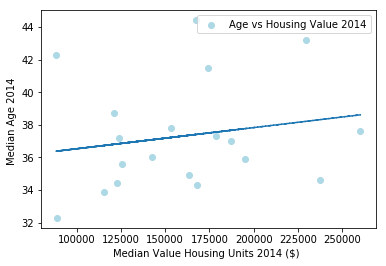

In [27]:
x_data = zillow_census_data["Median Value Housing Units 2014"]
y_data = zillow_census_data["Median Age 2014"]


plt.scatter(x_data, y_data, marker="o",color="lightblue", linewidth=1, label="Age vs Housing Value 2014")
plt.legend()
plt.xlabel("Median Value Housing Units 2014 ($) ")
plt.ylabel("Median Age 2014 ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.07354107450330295


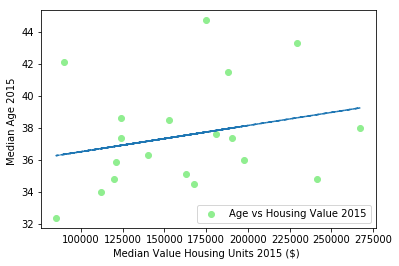

In [28]:
x_data = zillow_census_data["Median Value Housing Units 2015"]
y_data = zillow_census_data["Median Age 2015"]


plt.scatter(x_data, y_data, marker="o",color="lightgreen", linewidth=1, label="Age vs Housing Value 2015")
plt.legend()
plt.xlabel("Median Value Housing Units 2015 ($) ")
plt.ylabel("Median Age 2015 ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.07268731982423886


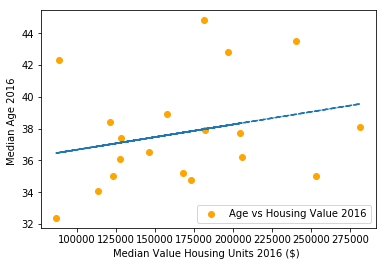

In [29]:
x_data = zillow_census_data["Median Value Housing Units 2016"]
y_data = zillow_census_data["Median Age 2016"]


plt.scatter(x_data, y_data, marker="o",color="orange", linewidth=1, label="Age vs Housing Value 2016")
plt.legend()
plt.xlabel("Median Value Housing Units 2016 ($) ")
plt.ylabel("Median Age 2016 ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

0.9513533510795599


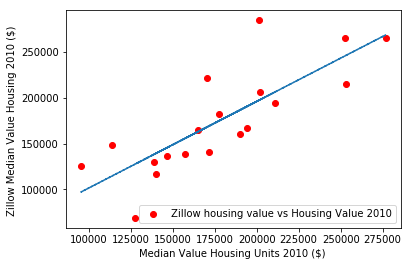

In [35]:

x_data = zillow_census_data["Median Value Housing Units 2010"]
y_data = zillow_census_data["Zillow Median Value Housing 2010"]


plt.scatter(x_data, y_data, marker="o",color="red", linewidth=1, label="Zillow housing value vs Housing Value 2010")
plt.legend()
plt.xlabel("Median Value Housing Units 2010 ($) ")
plt.ylabel("Zillow Median Value Housing 2010 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

1.0835968552923574


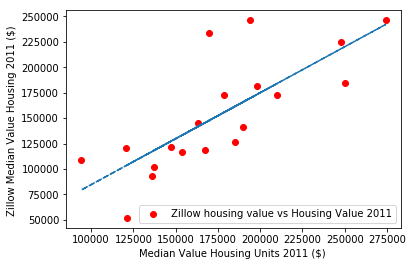

In [44]:
x_data = zillow_census_data["Median Value Housing Units 2011"].astype("l")
y_data = zillow_census_data["Zillow Median Value Housing 2011"]


plt.scatter(x_data, y_data, marker="o",color="red", linewidth=1, label="Zillow housing value vs Housing Value 2011")
plt.legend()
plt.xlabel("Median Value Housing Units 2011 ($) ")
plt.ylabel("Zillow Median Value Housing 2011 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

1.1658659883609963


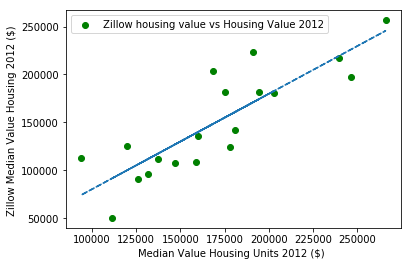

In [39]:
x_data = zillow_census_data["Median Value Housing Units 2012"]
y_data = zillow_census_data["Zillow Median Value Housing 2012"]


plt.scatter(x_data, y_data, marker="o",color="green", linewidth=1, label="Zillow housing value vs Housing Value 2012")
plt.legend()
plt.xlabel("Median Value Housing Units 2012 ($) ")
plt.ylabel("Zillow Median Value Housing 2012 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

1.2341224721769224


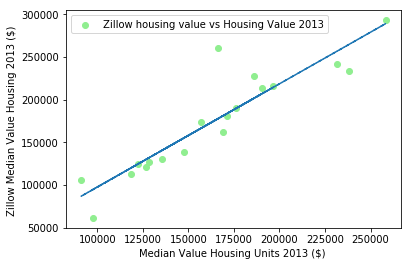

In [40]:
x_data = zillow_census_data["Median Value Housing Units 2013"]
y_data = zillow_census_data["Zillow Median Value Housing 2013"]


plt.scatter(x_data, y_data, marker="o",color="lightgreen", linewidth=1, label="Zillow housing value vs Housing Value 2013")
plt.legend()
plt.xlabel("Median Value Housing Units 2013 ($) ")
plt.ylabel("Zillow Median Value Housing 2013 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

1.1359910454675675


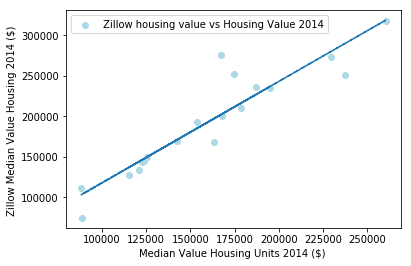

In [41]:
x_data = zillow_census_data["Median Value Housing Units 2014"]
y_data = zillow_census_data["Zillow Median Value Housing 2014"]


plt.scatter(x_data, y_data, marker="o",color="lightblue", linewidth=1, label="Zillow housing value vs Housing Value 2014")
plt.legend()
plt.xlabel("Median Value Housing Units 2014 ($) ")
plt.ylabel("Zillow Median Value Housing 2014 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

1.0715780384985063


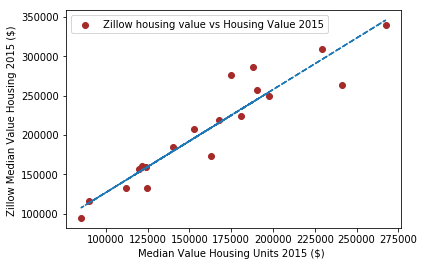

In [42]:
x_data = zillow_census_data["Median Value Housing Units 2015"]
y_data = zillow_census_data["Zillow Median Value Housing 2015"]


plt.scatter(x_data, y_data, marker="o",color="brown", linewidth=1, label="Zillow housing value vs Housing Value 2015")
plt.legend()
plt.xlabel("Median Value Housing Units 2015 ($) ")
plt.ylabel("Zillow Median Value Housing 2015 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

1.022766667425372


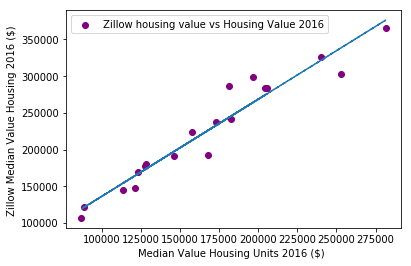

In [43]:
x_data = zillow_census_data["Median Value Housing Units 2016"]
y_data = zillow_census_data["Zillow Median Value Housing 2016"]


plt.scatter(x_data, y_data, marker="o",color="purple", linewidth=1, label="Zillow housing value vs Housing Value 2016")
plt.legend()
plt.xlabel("Median Value Housing Units 2016 ($) ")
plt.ylabel("Zillow Median Value Housing 2016 ($) ") 

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,  p(x_data), "--") 

slope, intercept = np.polyfit(np.log(x_data), np.log(y_data), 1)
print(slope)

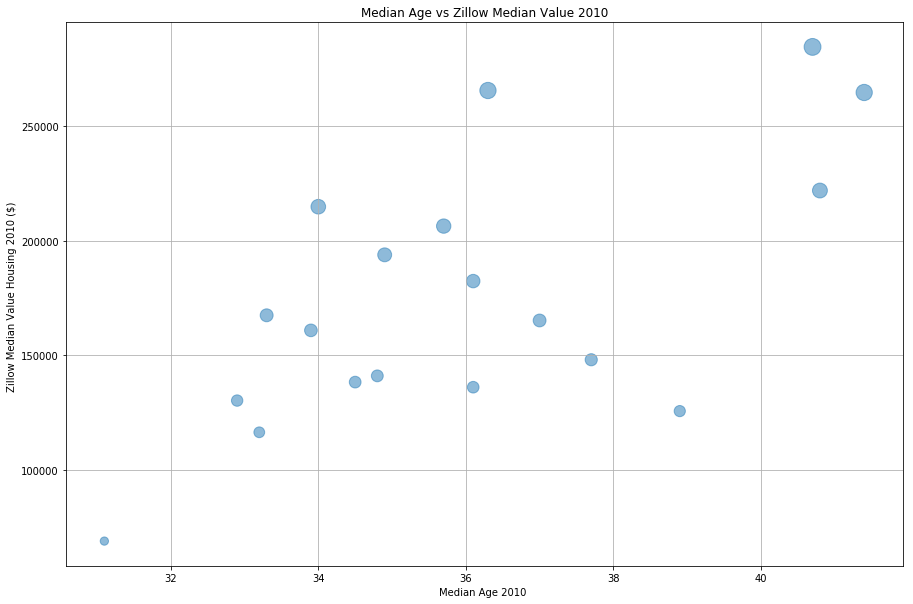

In [91]:
y = zillow_census_data["Zillow Median Value Housing 2010"]
x = zillow_census_data["Median Age 2010"]

plt.figure(figsize=(15,10))
plt.scatter(x, y, alpha=0.5, s=y/1000)
plt.grid()

plt.xlabel("Median Age 2010 ")
plt.ylabel("Zillow Median Value Housing 2010 ($) ") 
plt.title("Median Age vs Zillow Median Value 2010")

plt.show()



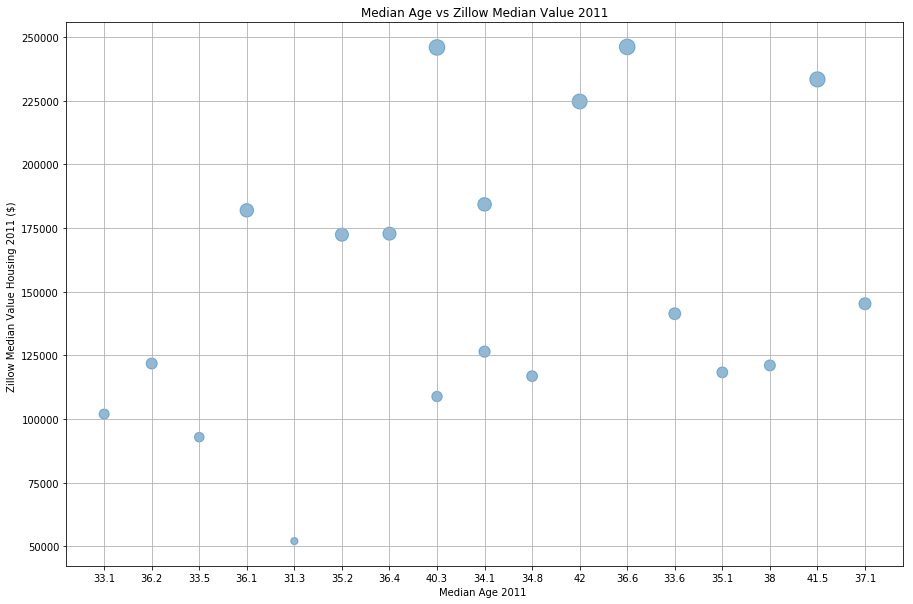

In [87]:
y = zillow_census_data["Zillow Median Value Housing 2011"]
x = zillow_census_data["Median Age 2011"]

plt.figure(figsize=(15,10))
plt.scatter(x, y, alpha=0.5, s=y/1000)
plt.grid()

plt.xlabel("Median Age 2011 ")
plt.ylabel("Zillow Median Value Housing 2011 ($) ") 
plt.title("Median Age vs Zillow Median Value 2011")

plt.show()


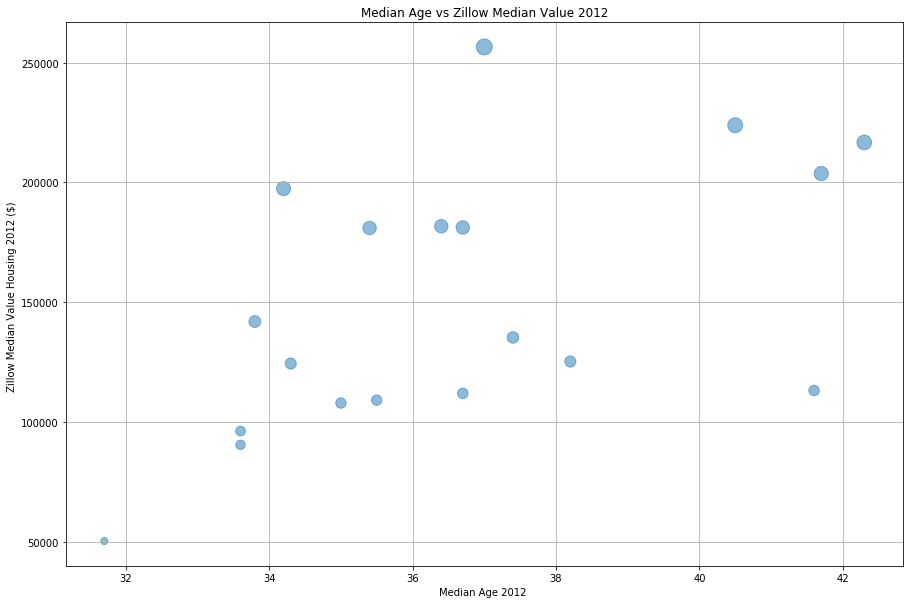

In [88]:
y = zillow_census_data["Zillow Median Value Housing 2012"]
x = zillow_census_data["Median Age 2012"]

plt.figure(figsize=(15,10))
plt.scatter(x, y, alpha=0.5, s=y/1000)
plt.grid()

plt.xlabel("Median Age 2012 ")
plt.ylabel("Zillow Median Value Housing 2012 ($) ") 
plt.title("Median Age vs Zillow Median Value 2012")

plt.show()


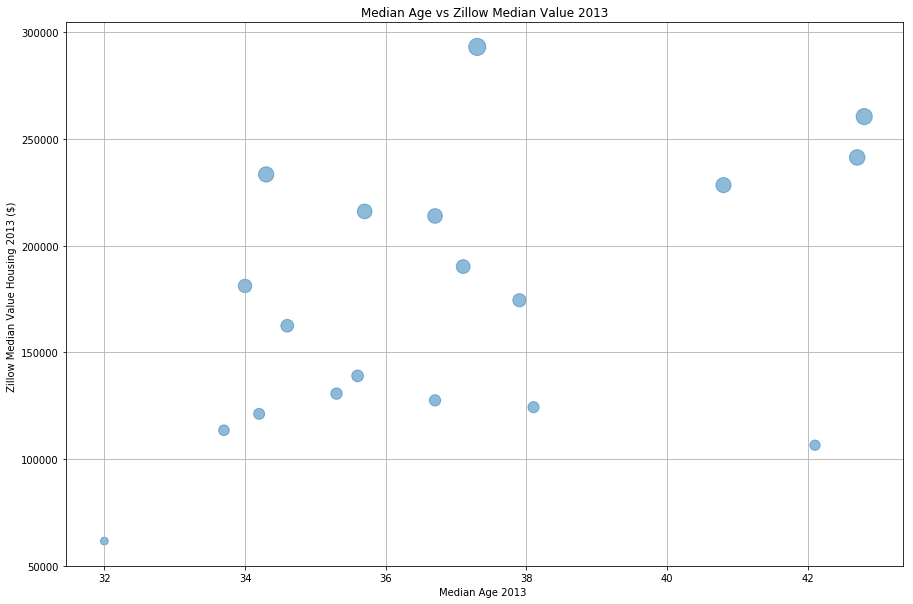

In [89]:
y = zillow_census_data["Zillow Median Value Housing 2013"]
x = zillow_census_data["Median Age 2013"]

plt.figure(figsize=(15,10))
plt.scatter(x, y, alpha=0.5, s=y/1000)
plt.grid()

plt.xlabel("Median Age 2013 ")
plt.ylabel("Zillow Median Value Housing 2013 ($) ") 
plt.title("Median Age vs Zillow Median Value 2013")

plt.show()

print("forgot something")


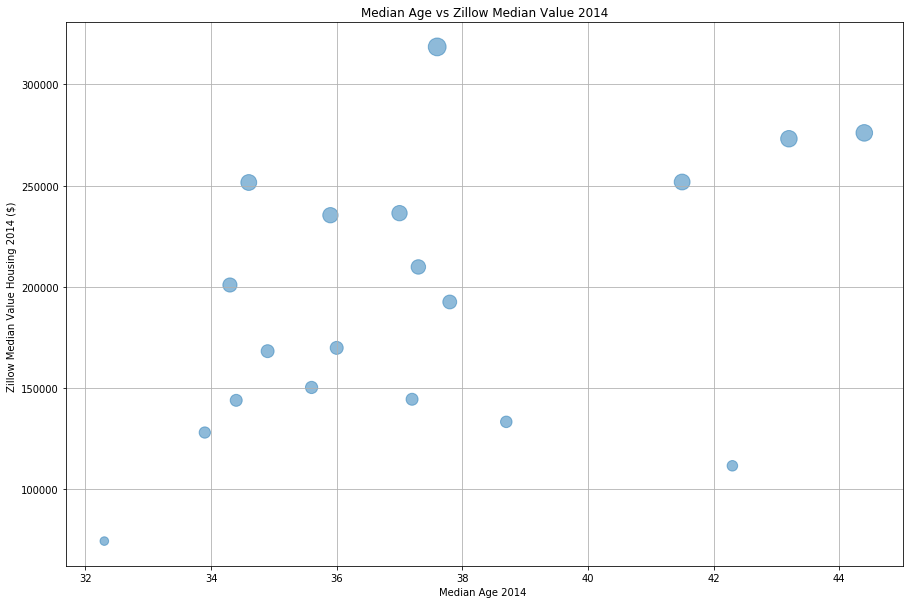

In [92]:
y = zillow_census_data["Zillow Median Value Housing 2014"]
x = zillow_census_data["Median Age 2014"]

plt.figure(figsize=(15,10))
plt.scatter(x, y, alpha=0.5, s=y/1000)
plt.grid()

plt.xlabel("Median Age 2014 ")
plt.ylabel("Zillow Median Value Housing 2014 ($) ") 
plt.title("Median Age vs Zillow Median Value 2014")

plt.show()


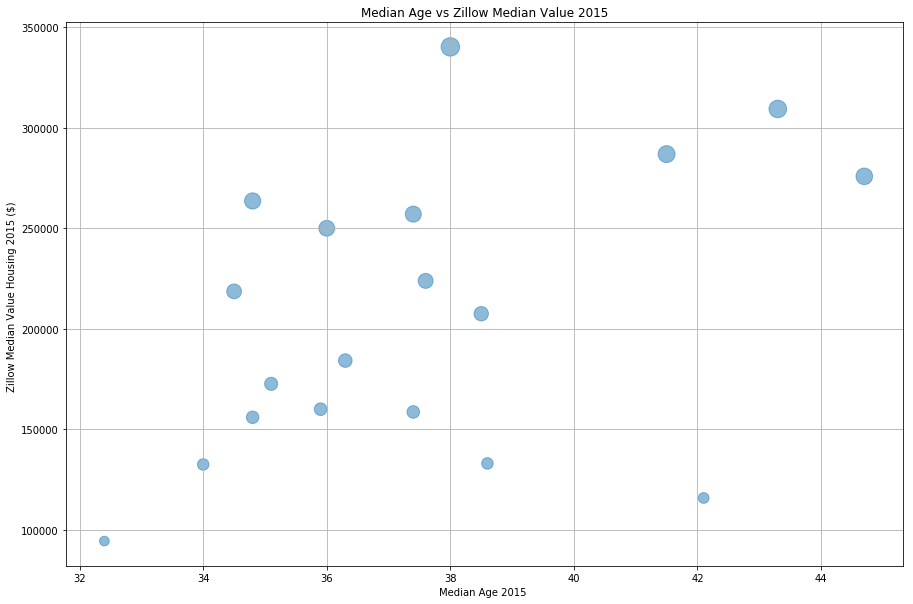

In [93]:
y = zillow_census_data["Zillow Median Value Housing 2015"]
x = zillow_census_data["Median Age 2015"]

plt.figure(figsize=(15,10))
plt.scatter(x, y, alpha=0.5, s=y/1000)
plt.grid()

plt.xlabel("Median Age 2015 ")
plt.ylabel("Zillow Median Value Housing 2015 ($) ") 
plt.title("Median Age vs Zillow Median Value 2015")

plt.show()


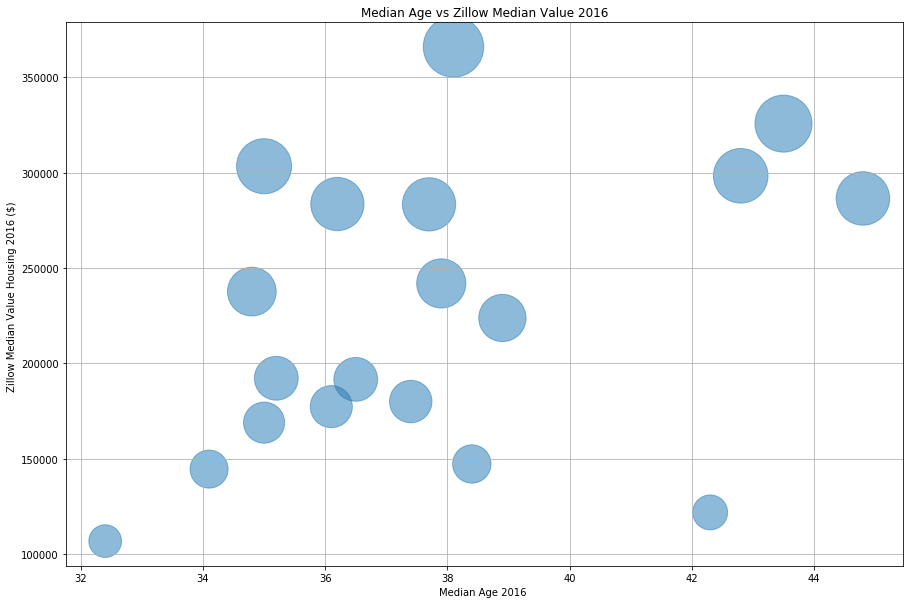

In [98]:
y = zillow_census_data["Zillow Median Value Housing 2016"]
x = zillow_census_data["Median Age 2016"]

plt.figure(figsize=(15,10))
plt.scatter(x, y, alpha=0.5, s=y/100)
plt.grid()

plt.xlabel("Median Age 2016 ")
plt.ylabel("Zillow Median Value Housing 2016 ($) ") 
plt.title("Median Age vs Zillow Median Value 2016")

plt.show()
